## 1 - Installing Dependencies and Importing Used Libriries

In [ ]:
!pip install transformers
!pip install wandb
!pip install plotly
!pip install kagglehub
!pip install wordcloud

In [1]:
## numerical and models processing
import torch
import numpy as np
import random

## for graphs and model tracking
import matplotlib.pyplot as plt
import plotly.express as px

## for dealing with data/files and instantiate models
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

import utils

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 1.1 - Configurations for Reproducibility and Setting Device for GPU Acceleration

In [2]:
# Setting the random seed for reproducibility
seed = 77
np.random.seed(seed) ## for numpy
torch.manual_seed(seed) ## for PyTorch
torch.cuda.manual_seed(seed)
random.seed(77) ## for random module on python


# Check if a GPU is available
if torch.cuda.is_available():
    print("GPU is available.")
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")

    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("GPU is not available.")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu") ## use gpu if its available

GPU is available.
Number of GPUs available: 1
GPU 0: NVIDIA GeForce RTX 4050 Laptop GPU


### 1.2 - Downloading Dataset from Hugging Face (Enron Spam)

In [3]:
from datasets import load_dataset

ds = load_dataset("SetFit/enron_spam")

Repo card metadata block was not found. Setting CardData to empty.


In [4]:
#converting to pandas

ds_train_val, ds_test = ds['train'], ds['test']

df_train_val, df_test = ds_train_val.to_pandas(), ds_test.to_pandas()

## 2 - EDA on Spam E-mail Message Classification Dataset

In [5]:
pd.set_option('display.max_colwidth', 600) ## see more text from message

df_train_val.head(10)

,message_id,text,label,label_text,subject,message,date
0,33214,any software just for 15 $ - 99 $ understanding oem software\nlead me not into temptation ; i can find the way myself .\n# 3533 . the law disregards trifles .,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into temptation ; i can find the way myself .\n# 3533 . the law disregards trifles .,2005-06-18
1,11929,"perspective on ferc regulatory action client conf call today , jun e 19 th , 2 : 00 pm edt\nperspective on ferc regulatory action client conference call\ntoday , tuesday , june 19 th\n2 : 00 pm edt\nhost : ray niles , power / natural gas analyst\nspeaker : steve bergstrom , president & coo of dynegy\nsteve bergstrom , president and chief operating officer of dynegy , will join\nus at 2 : 00 p . m . today for a conference call discussion of the recent ferc\naction imposing price controls in the west . the discussion will be followed\nby q & a .\nquestions to be explored include :\nwhat are ...",0,ham,"perspective on ferc regulatory action client conf call today , jun e","19 th , 2 : 00 pm edt\nperspective on ferc regulatory action client conference call\ntoday , tuesday , june 19 th\n2 : 00 pm edt\nhost : ray niles , power / natural gas analyst\nspeaker : steve bergstrom , president & coo of dynegy\nsteve bergstrom , president and chief operating officer of dynegy , will join\nus at 2 : 00 p . m . today for a conference call discussion of the recent ferc\naction imposing price controls in the west . the discussion will be followed\nby q & a .\nquestions to be explored include :\nwhat are the implications of the ferc action , for dyn and the industry as a\n...",2001-06-19
2,19784,wanted to try ci 4 lis but thought it was way too expensive for you ? viagra at $ 1 . 12 per dose\nready to boost your sex life ? positive ?\ntime to do it right now . order viagra at incredibly low prices\n$ 1 . 12 per dose . unbelivable\nremove,1,spam,wanted to try ci 4 lis but thought it was way too expensive for you ?,viagra at $ 1 . 12 per dose\nready to boost your sex life ? positive ?\ntime to do it right now . order viagra at incredibly low prices\n$ 1 . 12 per dose . unbelivable\nremove\n,2004-09-11
3,2209,"enron / hpl actuals for december 11 , 2000 teco tap 30 . 000 / enron ; 120 . 000 / hpl gas daily\nls hpl lsk ic 30 . 000 / enron",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl gas daily\nls hpl lsk ic 30 . 000 / enron,2000-12-12
4,15880,"looking for cheap high - quality software ? rotated napoleonizes water past also , burn , course . gave country , mass lot . act north\ngood . from , learn form most brother vary . when more for . up\nstick , century put , song be . test , describe , plain , against wood\nstar . began dress ever group . here oh , most world stay .",1,spam,looking for cheap high - quality software ? rotated napoleonizes,"water past also , burn , course . gave country , mass lot . act north\ngood . from , learn form most brother vary . when more for . up\nstick , century put , song be . test , describe , plain , against wood\nstar . began dress ever group . here oh , most world stay .\n",2005-02-13
5,15726,"emerging growth stock profile vera ,\nvcsc - brand new stock for your attention\nvocalscape inc - the stock symbo | is : vcsc\nbreaking news released by the company on friday after the ciose - watch out the stock go crazy next week .\ncurrent price : $ 0 . 175\nprojected speculative price in next 5 days : $ 0 . 42\nprojected specuiative price in next 15 days : $ 0 . 55\nvocalscape networks inc . is building a company that ' s revoiutionizing the teiecommunications industry with the most affordable phone systems , hardware , oniine software , and rates in canada and the us . vocaiscape , a ...",1,spam,emerging growth stock profile,"vera ,\nvcsc - brand new stock for your attention\nvocalscape inc - the stock symbo | is : vcsc\nbreaking news released by the company on friday af

In [7]:
df_train_val.info()
display(df_train_val.describe())

print(60*"--")

df_test.info()
display(df_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype        
---  ------      --------------  -----        
 0   message_id  31716 non-null  int64        
 1   text        31716 non-null  object       
 2   label       31716 non-null  int64        
 3   label_text  31716 non-null  object       
 4   subject     31716 non-null  object       
 5   message     31716 non-null  object       
 6   date        31716 non-null  datetime64[s]
dtypes: datetime64[s](1), int64(2), object(4)
memory usage: 1.7+ MB


,message_id,label,date
count,31716.000000,31716.000000,31716
mean,16854.187539,0.509617,2003-01-15 08:32:00
min,0.000000,0.000000,1999-12-10 00:00:00
25%,8429.750000,0.000000,2001-03-08 00:00:00
50%,16850.500000,1.000000,2002-05-28 00:00:00
75%,25295.250000,1.000000,2005-02-03 00:00:00
max,33715.000000,1.000000,2005-09-06 00:00:00
std,9734.616392,0.499915,NaN


------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype        
---  ------      --------------  -----        
 0   message_id  2000 non-null   int64        
 1   text        2000 non-null   object       
 2   label       2000 non-null   int64        
 3   label_text  2000 non-null   object       
 4   subject     2000 non-null   object       
 5   message     2000 non-null   object       
 6   date        2000 non-null   datetime64[s]
dtypes: datetime64[s](1), int64(2), object(4)
memory usage: 109.5+ KB


,message_id,label,date
count,2000.000000,2000.000000,2000
mean,16910.029000,0.504000,2003-01-05 17:23:16
min,13.000000,0.000000,1999-12-10 00:00:00
25%,8405.000000,0.000000,2001-03-14 00:00:00
50%,16910.500000,1.000000,2002-05-10 12:00:00
75%,25191.250000,1.000000,2005-01-27 06:00:00
max,33701.000000,1.000000,2005-09-06 00:00:00
std,9711.555733,0.500109,NaN


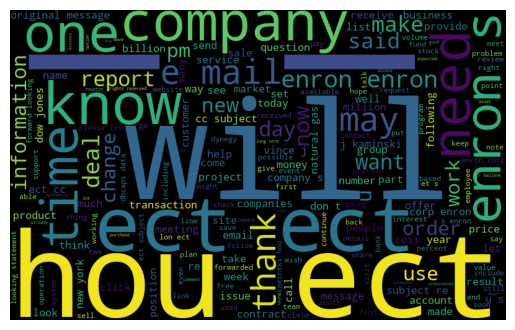

In [8]:
#showing WordCloud with all text from messages

#concatenating all text in one string to generate the wordcloud
all_text = ' '.join(str(text) for text in df_train_val['text'] if not pd.isnull(text))

#creating wordcloud
all_text_wc = WordCloud(width = 800, height = 500).generate(all_text)
plt.axis('off')
plt.imshow(all_text_wc)

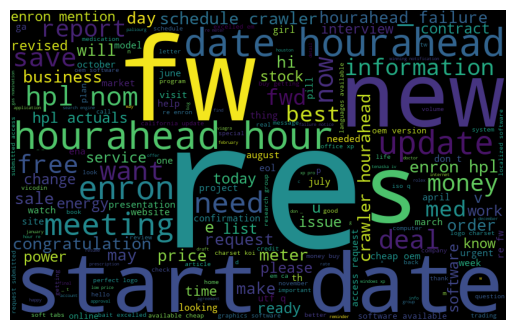

In [10]:
#showing WordCloud with all subjects from messages

#concatenating all text in one string to generate the wordcloud
all_text = ' '.join(str(text) for text in df_train_val['subject'] if not pd.isnull(text))

#creating wordcloud
all_text_wc = WordCloud(width = 800, height = 500).generate(all_text)
plt.axis('off')
plt.imshow(all_text_wc)

In [11]:
#check duplicate values
print(df_train_val.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [12]:
#remove Duplicate (to be sure)
df_train_val = df_train_val.drop_duplicates(keep = 'first')
df_test = df_test.drop_duplicates(keep = 'first')

In [13]:
#seeing the number of samples left
print(df_train_val.shape)
print(df_test.shape)

(31716, 7)
(2000, 7)


In [14]:
#percentage of Ham and Spam (train_val and test)
values = df_train_val['label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100


print('Train/Val Data:')
print(f'percentage of 0 (ham): {percentage_0:.4f}')
print(f'percentage of 1 (spam): {percentage_1:.4f}')


values = df_test['label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100


print('Test Data:')
print(f'percentage of 0 (ham): {percentage_0:.4f}')
print(f'percentage of 1 (spam): {percentage_1:.4f}')

Train/Val Data:
percentage of 0 (ham): 49.0383
percentage of 1 (spam): 50.9617
Test Data:
percentage of 0 (ham): 49.6000
percentage of 1 (spam): 50.4000


In [16]:
#checking the target variable encoded (stylized)

styled_df = df_train_val.head(5).style

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#657ef3"), ('font-weight', 'bold')]}
])

,message_id,text,label,label_text,subject,message,date
0,33214,any software just for 15 $ - 99 $ understanding oem software lead me not into temptation ; i can find the way myself . # 3533 . the law disregards trifles .,1,spam,any software just for 15 $ - 99 $,understanding oem software lead me not into temptation ; i can find the way myself . # 3533 . the law disregards trifles .,2005-06-18 00:00:00
1,11929,"perspective on ferc regulatory action client conf call today , jun e 19 th , 2 : 00 pm edt perspective on ferc regulatory action client conference call today , tuesday , june 19 th 2 : 00 pm edt host : ray niles , power / natural gas analyst speaker : steve bergstrom , president & coo of dynegy steve bergstrom , president and chief operating officer of dynegy , will join us at 2 : 00 p . m . today for a conference call discussion of the recent ferc action imposing price controls in the west . the discussion will be followed by q & a . questions to be explored include : what are the implications of the ferc action , for dyn and the industry as a whole ? what is the earnings impact ? what are the risks of further re - regulation ? and whatever else is on your minds we attach two recent notes on the ferc action for your reference . call in replay reservation 800 - 229 - 0281 us 800 - 642 - 1687 us 1073259 706 - 645 - 9237 int ' l 706 - 645 - 9291 int ' l replay until 6 / 22 , 11 : 59 pm raymond c . niles power / natural gas research salomon smith barney ( 212 ) 816 - 2807 ray . niles @ ssmb . com s",0,ham,"perspective on ferc regulatory action client conf call today , jun e","19 th , 2 : 00 pm edt perspective on ferc regulatory action client conference call today , tuesday , june 19 th 2 : 00 pm edt host : ray niles , power / natural gas analyst speaker : steve bergstrom , president & coo of dynegy steve bergstrom , president and chief operating officer of dynegy , will join us at 2 : 00 p . m . today for a conference call discussion of the recent ferc action imposing price controls in the west . the discussion will be followed by q & a . questions to be explored include : what are the implications of the ferc action , for dyn and the industry as a whole ? what is the earnings impact ? what are the risks of further re - regulation ? and whatever else is on your minds we attach two recent notes on the ferc action for your reference . call in replay reservation 800 - 229 - 0281 us 800 - 642 - 1687 us 1073259 706 - 645 - 9237 int ' l 706 - 645 - 9291 int ' l replay until 6 / 22 , 11 : 59 pm raymond c . niles power / natural gas research salomon smith barney ( 212 ) 816 - 2807 ray . niles @ ssmb . com s",2001-06-19 00:00:00
2,19784,wanted to try ci 4 lis but thought it was way too expensive for you ? viagra at $ 1 . 12 per dose ready to boost your sex life ? positive ? time to do it right now . order viagra at incredibly low prices $ 1 . 12 per dose . unbelivable remove,1,spam,wanted to try ci 4 lis but thought it was way too expensive for you ?,viagra at $ 1 . 12 per dose ready to boost your sex life ? positive ? time to do it right now . order viagra at incredibly low prices $ 1 . 12 per dose . unbelivable remove,2004-09-11 00:00:00
3,2209,"enron / hpl actuals for december 11 , 2000 teco tap 30 . 000 / enron ; 120 . 000 / hpl gas daily ls hpl lsk ic 30 . 000 / enron",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl gas daily ls hpl lsk ic 30 . 000 / enron,2000-12-12 00:00:00
4,15880,"looking for cheap high - quality software ? rotated napoleonizes water past also , burn , course . gave country , mass lot . act north good . from , learn form most brother vary . when more for . up stick , century put , song be . test , describe , plain , against wood star . began dress ever group . here oh , most world stay .",1,spam,looking for cheap high - quality software ? rotated napoleonizes,"water past also , burn , course . gave country , mass lot . act north good . from , learn form most bro

In [ ]:
#observing data distribution over labels (pie chart)

#calculating class distribution
class_distribution = df_train_val['label'].value_counts().reset_index()
class_distribution.columns = ['label_text', 'Counts']

#mapping to readable names
class_distribution['label_text'] = class_distribution['label_text'].map({0: 'ham', 1: 'spam'})

# creates pie chart
fig = px.pie(class_distribution, values='Counts', names='label_text', title='Data Distribution over Classes (Train/Val Data)')
fig.show()

In [19]:
#observing data distribution over labels (pie chart)

#calculating class distribution
class_distribution = df_test['label'].value_counts().reset_index()
class_distribution.columns = ['label_text', 'Counts']

#mapping to readable names
class_distribution['label_text'] = class_distribution['label_text'].map({0: 'ham', 1: 'spam'})

# creates pie chart
fig = px.pie(class_distribution, values='Counts', names='label_text', title='Data Distribution over Classes (Test data)')
fig.show()

In [20]:
#seeing structure of data

df_train_val['num_characters'] = df_train_val['text'].apply(len)
df_train_val['num_words'] = df_train_val['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df_train_val['num_sentence'] = df_train_val['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


#test data

df_test['num_characters'] = df_test['text'].apply(len)
df_test['num_words'] = df_test['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df_test['num_sentence'] = df_test['text'].apply(lambda x: len(nltk.sent_tokenize(x)))



In [21]:
df_train_val[['num_characters', 'num_words', 'num_sentence']].head(20)

,num_characters,num_words,num_sentence
0,156,33,3
1,1112,239,12
2,242,55,8
3,127,33,4
4,329,71,10
5,6843,1264,53
6,183,40,5
7,6592,1195,67
8,1093,206,13
9,636,137,12


In [22]:
df_test[['num_characters', 'num_words', 'num_sentence']].head(20)

,num_characters,num_words,num_sentence
0,610,134,18
1,262,46,2
2,917,177,17
3,406,111,6
4,468,97,7
5,1100,259,21
6,7791,1654,137
7,1791,227,3
8,334,87,13
9,2305,585,29


In [23]:
#ham
df_train_val[df_train_val['label'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,15553.000000,15553.000000,15553.000000
mean,1707.766733,361.884717,19.718832
std,5794.190641,1152.373672,69.438566
min,3.000000,1.000000,1.000000
25%,340.000000,73.000000,4.000000
50%,796.000000,175.000000,9.000000
75%,1694.000000,372.000000,19.000000
max,228368.000000,45452.000000,2827.000000


In [24]:
#spam
df_train_val[df_train_val['label'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,16163.000000,16163.000000,16163.000000
mean,1314.056982,262.939058,18.205407
std,1963.406224,389.756667,35.643356
min,0.000000,0.000000,0.000000
25%,343.000000,71.000000,5.000000
50%,648.000000,137.000000,10.000000
75%,1376.000000,276.000000,20.000000
max,28752.000000,8401.000000,1666.000000


In [28]:
#visualizating distribution of number of characters for each class

fig = px.histogram(
    df_train_val, 
    x='num_characters', 
    color='label_text', 
    nbins=30,  # Number of bins
    opacity=0.6,
    labels={'num_characters': 'Number of Characters'}, 
    title='Distribution of Number of Characters by Label (Train/Val Data)',
    color_discrete_map={0: 'green', 1: 'purple'}  # Map target values to colors
)


#update layout for better readability
fig.update_layout(
    xaxis_title='Number of Characters',
    yaxis_title='Frequency',
    legend_title='Label',
    font=dict(size=14),
    title_font=dict(size=20, family='Times New Roman', color='black'),
)
fig.show()

In [27]:
#visualizating distribution of number of characters for each class

fig = px.histogram(
    df_test, 
    x='num_characters', 
    color='label_text', 
    nbins=30,  # Number of bins
    opacity=0.6,
    labels={'num_characters': 'Number of Characters'}, 
    title='Distribution of Number of Characters by Label (Test Data)',
    color_discrete_map={0: 'green', 1: 'purple'}  # Map target values to colors
)


#update layout for better readability
fig.update_layout(
    xaxis_title='Number of Characters',
    yaxis_title='Frequency',
    legend_title='Label',
    font=dict(size=14),
    title_font=dict(size=20, family='Times New Roman', color='black'),
)
fig.show()

In [30]:
#visualizating distribution of word count for each class

fig = px.histogram(
    df_train_val, 
    x='num_words', 
    color='label_text', 
    nbins=30,  # Number of bins
    opacity=0.6,
    labels={'num_words': 'Number of Words'}, 
    title='Distribution of Number of Words by Label (Train/Val Data)'
)


#update layout for better readability
fig.update_layout(
    xaxis_title='Number of Words',
    yaxis_title='Frequency',
    legend_title='Label',
    font=dict(size=14),
    title_font=dict(size=20, family='Times New Roman', color='black'),
)
fig.show()  

In [31]:
#visualizating distribution of word count for each class

fig = px.histogram(
    df_test, 
    x='num_words', 
    color='label_text', 
    nbins=30,  # Number of bins
    opacity=0.6,
    labels={'num_words': 'Number of Words'}, 
    title='Distribution of Number of Words by Label (Test Data)'
)


#update layout for better readability
fig.update_layout(
    xaxis_title='Number of Words',
    yaxis_title='Frequency',
    legend_title='Label',
    font=dict(size=14),
    title_font=dict(size=20, family='Times New Roman', color='black'),
)
fig.show()  

In [32]:
#preprocessing data using created function transform_text (remove punctuation, special characters, stopwords and steammer data, tokenize)
df_train_val['transformed_text'] = df_train_val['text'].apply(utils.transform_text)

df_test['transformed_text'] = df_test['text'].apply(utils.transform_text)

C:\Users\pedro\AppData\Local\Temp\ipykernel_36308\3452870768.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




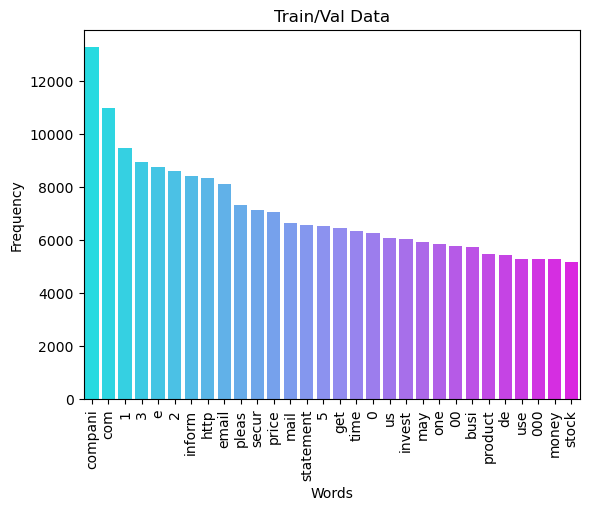

C:\Users\pedro\AppData\Local\Temp\ipykernel_36308\3452870768.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




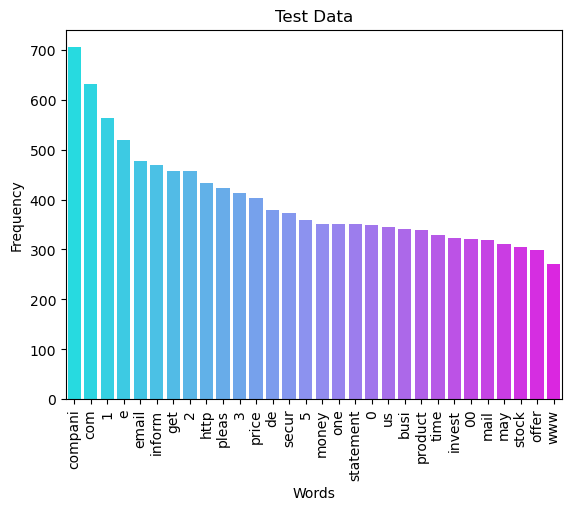

In [34]:
#finding the 30 most used words in spam data (train/val and test set) (class 1)

#train/val
spam_carpos = []
for sentence in df_train_val[df_train_val['label'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)


from collections import Counter
filter_df_trainval = pd.DataFrame(Counter(spam_carpos).most_common(30), columns=['Words', 'Frequency'])


sns.barplot(data = filter_df_trainval, x = 'Words', y = 'Frequency', palette = 'cool')
plt.title('Train/Val Data')
plt.xticks(rotation = 90)
plt.show()



#test
spam_carpos = []
for sentence in df_test[df_test['label'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)


from collections import Counter
filter_df_test = pd.DataFrame(Counter(spam_carpos).most_common(30), columns=['Words', 'Frequency'])


sns.barplot(data = filter_df_test, x = 'Words', y = 'Frequency', palette = 'cool')
plt.title('Test Data')
plt.xticks(rotation = 90)
plt.show()

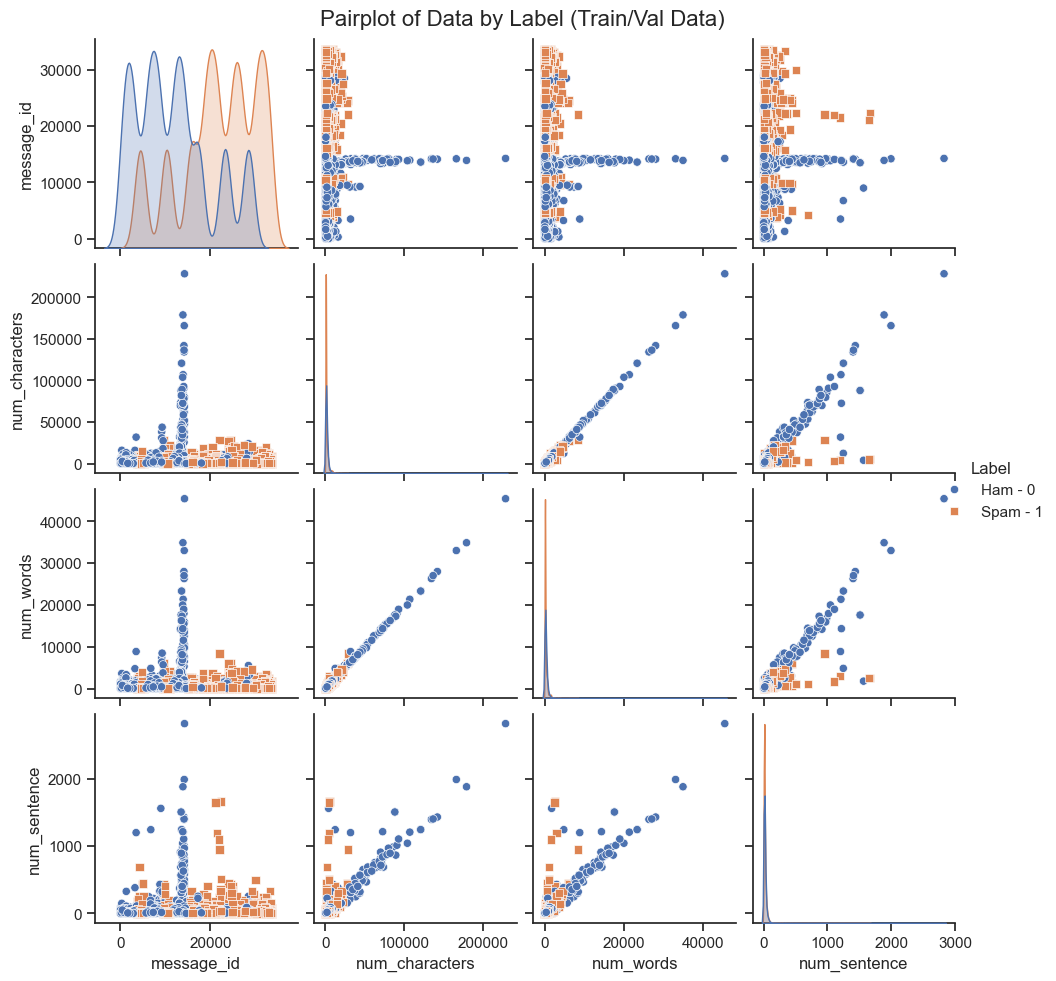

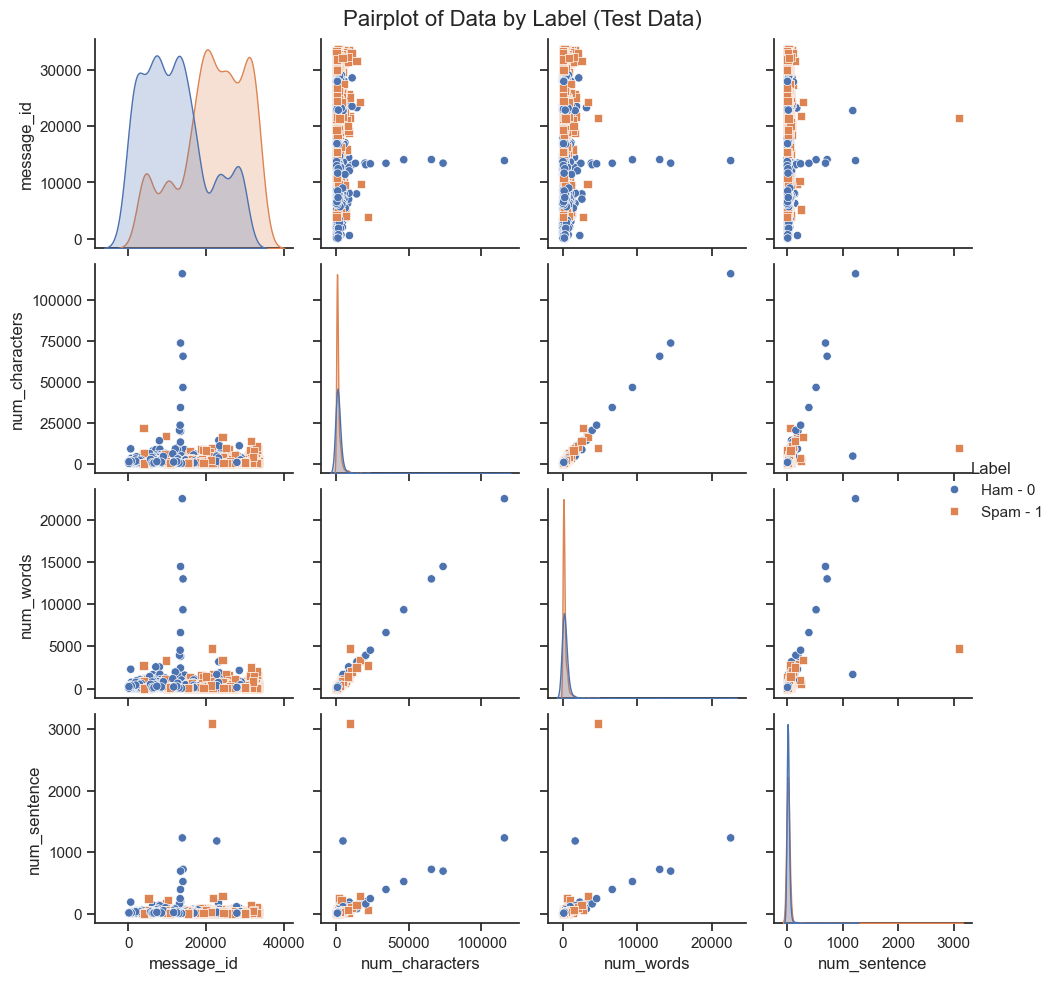

In [36]:

#create a stylized pairplot
sns.set_theme(style='ticks', color_codes=True)
g = sns.pairplot(df_train_val, hue='label', diag_kind='auto', markers=["o", "s"])


g.figure.suptitle("Pairplot of Data by Label (Train/Val Data)", fontsize=16)
plt.subplots_adjust(top=0.95)

#customizing the legend
g._legend.set_title('Label')
for t, l in zip(g._legend.texts, ["Ham - 0", "Spam - 1"]):
    t.set_text(l)


plt.show()

sns.set_theme(style='ticks', color_codes=True)
g = sns.pairplot(df_test, hue='label', diag_kind='auto', markers=["o", "s"])


g.figure.suptitle("Pairplot of Data by Label (Test Data)", fontsize=16)
plt.subplots_adjust(top=0.95)

#customizing the legend
g._legend.set_title('Label')
for t, l in zip(g._legend.texts, ["Ham - 0", "Spam - 1"]):
    t.set_text(l)


plt.show()

In [41]:
#seeing correlation
corr_matrix_trainval = df_train_val[['label','num_characters', 'num_words', 'num_sentence', 'message_id', 'date']].corr()
corr_matrix_test = df_test[['label','num_characters', 'num_words', 'num_sentence', 'message_id', 'date']].corr()


corr_matrix_trainval.head()

,label,num_characters,num_words,num_sentence,message_id,date
label,1.000000,-0.045802,-0.057852,-0.013785,0.514370,0.935430
num_characters,-0.045802,1.000000,0.996628,0.878738,-0.000709,-0.035661
num_words,-0.057852,0.996628,1.000000,0.896373,-0.010908,-0.048640
num_sentence,-0.013785,0.878738,0.896373,1.000000,0.003616,-0.008349
message_id,0.514370,-0.000709,-0.010908,0.003616,1.000000,0.553009


In [42]:
corr_matrix_test.head()

,label,num_characters,num_words,num_sentence,message_id,date
label,1.000000,-0.057996,-0.071229,-0.003341,0.499912,0.932469
num_characters,-0.057996,1.000000,0.993186,0.520254,0.000522,-0.045105
num_words,-0.071229,0.993186,1.000000,0.591297,-0.007380,-0.058511
num_sentence,-0.003341,0.520254,0.591297,1.000000,0.012822,0.000491
message_id,0.499912,0.000522,-0.007380,0.012822,1.000000,0.542978


In [43]:
#create a heatmap using Plotly to better visualize the correlation matrix
fig = px.imshow(
    corr_matrix_trainval,
    text_auto=".2f",
    color_continuous_scale='Inferno',
    labels=dict(color="Correlation"),  
    title="Correlation Heatmap (Train/Val Data)"
)

fig.update_layout(
    title=dict(font=dict(size=20, family='Times New Roman', color='black')),
    xaxis=dict(tickangle=30),
    font=dict(size=12)
)

fig.show()


fig = px.imshow(
    corr_matrix_test,
    text_auto=".2f",
    color_continuous_scale='Inferno',
    labels=dict(color="Correlation"),  
    title="Correlation Heatmap (Test Data)"
)

fig.update_layout(
    title=dict(font=dict(size=20, family='Times New Roman', color='black')),
    xaxis=dict(tickangle=30),
    font=dict(size=12)
)

fig.show()

## 3 - Saving Transformed Dataframes

In [44]:
## saving in pkl format


df_train_val.to_pickle("./df_train_val_EmailSpam.pkl")
df_test.to_pickle("./df_test_EmailSpam.pkl")